# Análisis de Calidad del Vino - Proyecto PC1

---
---

## Detalles del Proyecto

- **Grupo**: Grupo 4
- **Máster**: Data Science, Inteligencia Artificial y Data Engineering  
- **Fecha de Creación**: 25 de enero de 2025
- **Fecha de Entrega Límite**: 28 de febrero de 2025


---




## Componentes del Equipo

| Nombre                     | Máster                     | Email                             |
|----------------------------|----------------------------|-----------------------------------|
| Antonio Baya Castells      | Máster Data Science        | antonio.baya@alu.mbitschool.com  |
| Mariano Jiménez Bohórquez  | Máster Inteligencia Artificial | mariano.jimenez@alu.mbitschool.com |
| Juan Olivares Díez         | Máster Inteligencia Artificial | juan.olivares@alu.mbitschool.com |


---

## Introducción

Este notebook documenta el desarrollo del **Proyecto PC1**, centrado en el análisis de datos sobre la calidad de vinos tintos y blancos. Se busca aplicar técnicas de análisis de datos, limpieza, visualización y consultas SQL para extraer patrones "relevantes" que diferencien la calidad de los vinos.

El documento incluye los siguientes pasos:
1. Descarga y preparación de los datos.
2. Limpieza y manejo de valores atípicos.
3. Integración de los datos en una base de datos SQLite.
4. Consultas SQL para obtener información clave.
5. Exportación de datos en formato JSONLines.
6. Análisis visual y conclusiones.


---

El objetivo es presentar un análisis, combinando herramientas como Python, Pandas y SQLite, y documentar cada paso del proceso.

---


# **1. Descarga de Datos**

## Preparación del Entorno


Hemos creado un entorno desde el terminal. desde el que se ha lanzado Jupiter Notebook. Una vez confirmamos que esta correctamente activado el entorno, procedemos a instalar las librerías que creemos son necesarias.

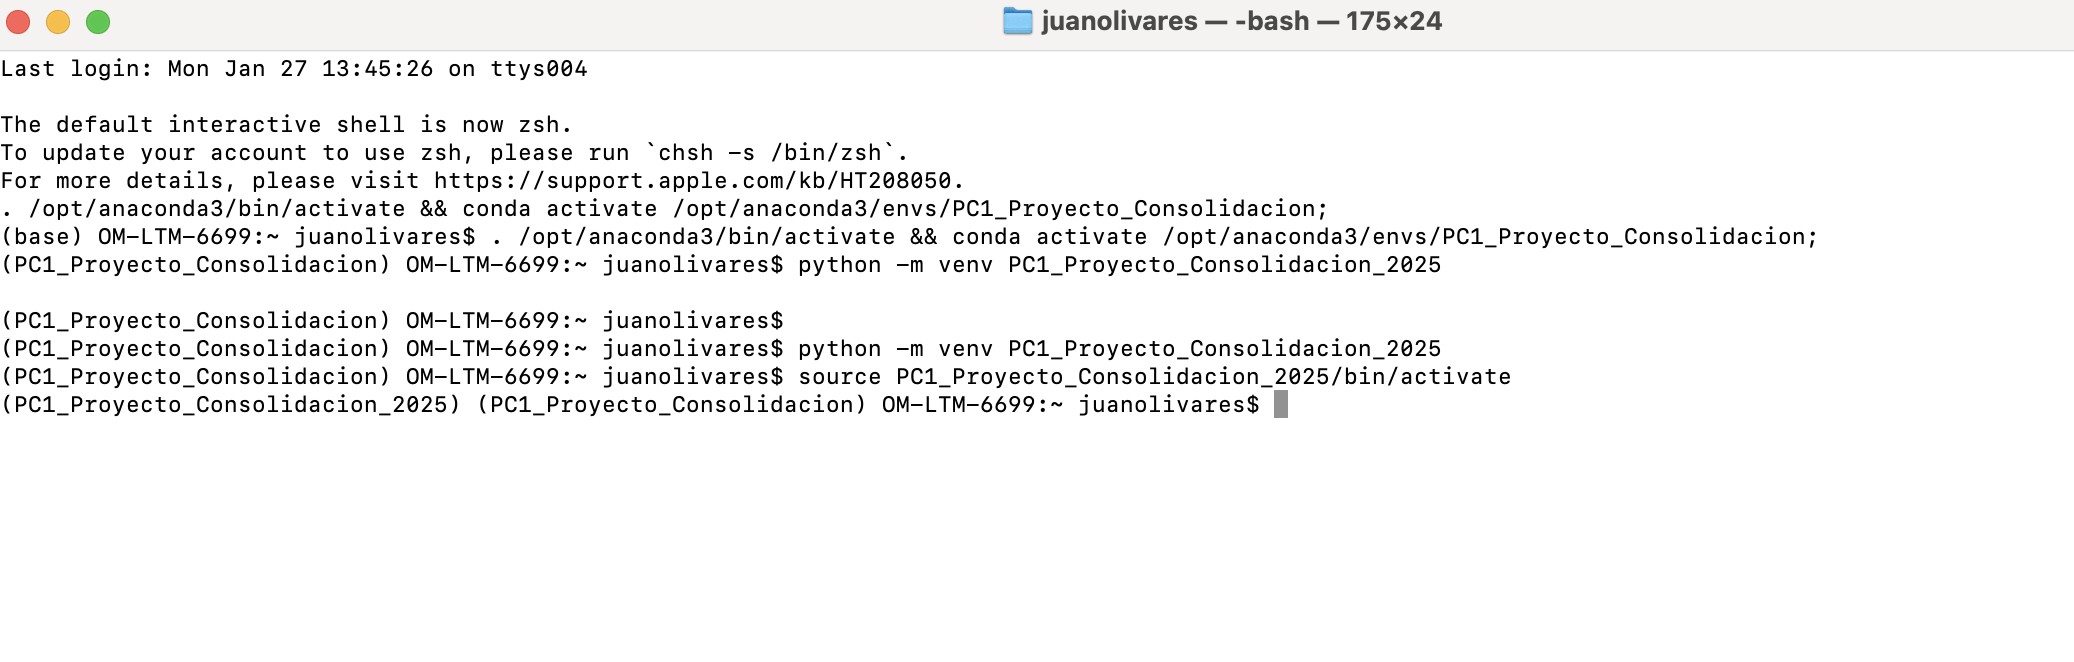

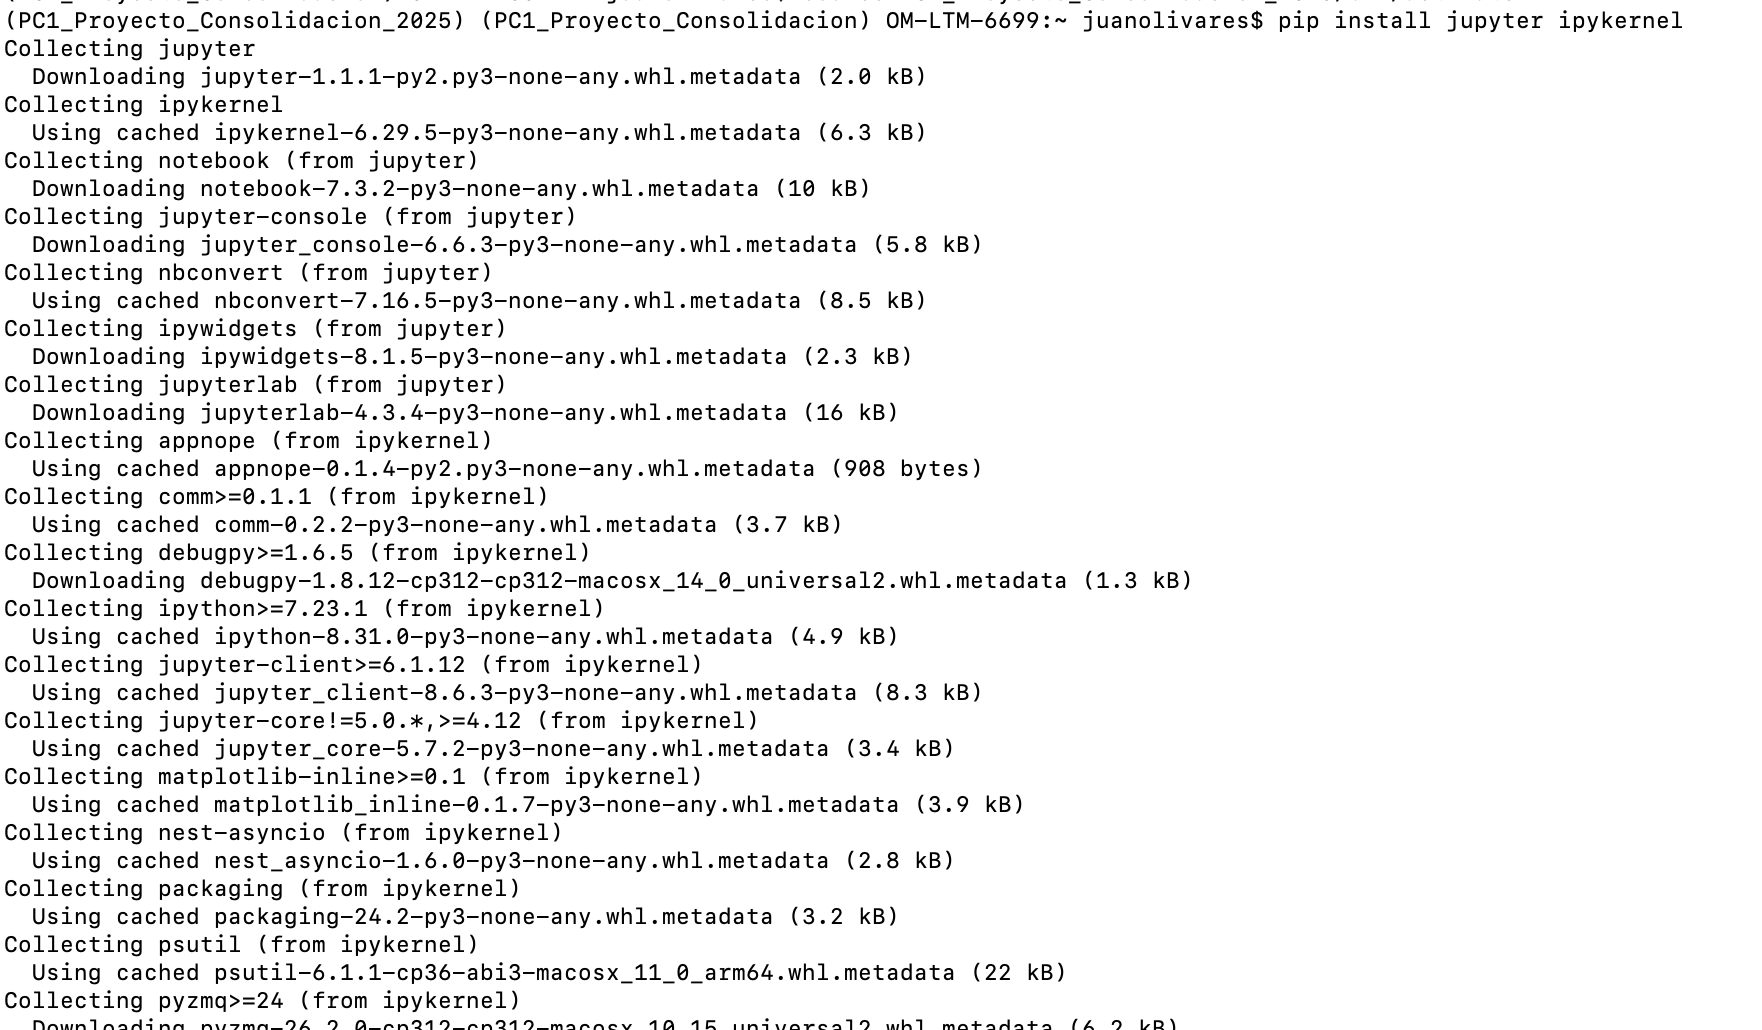


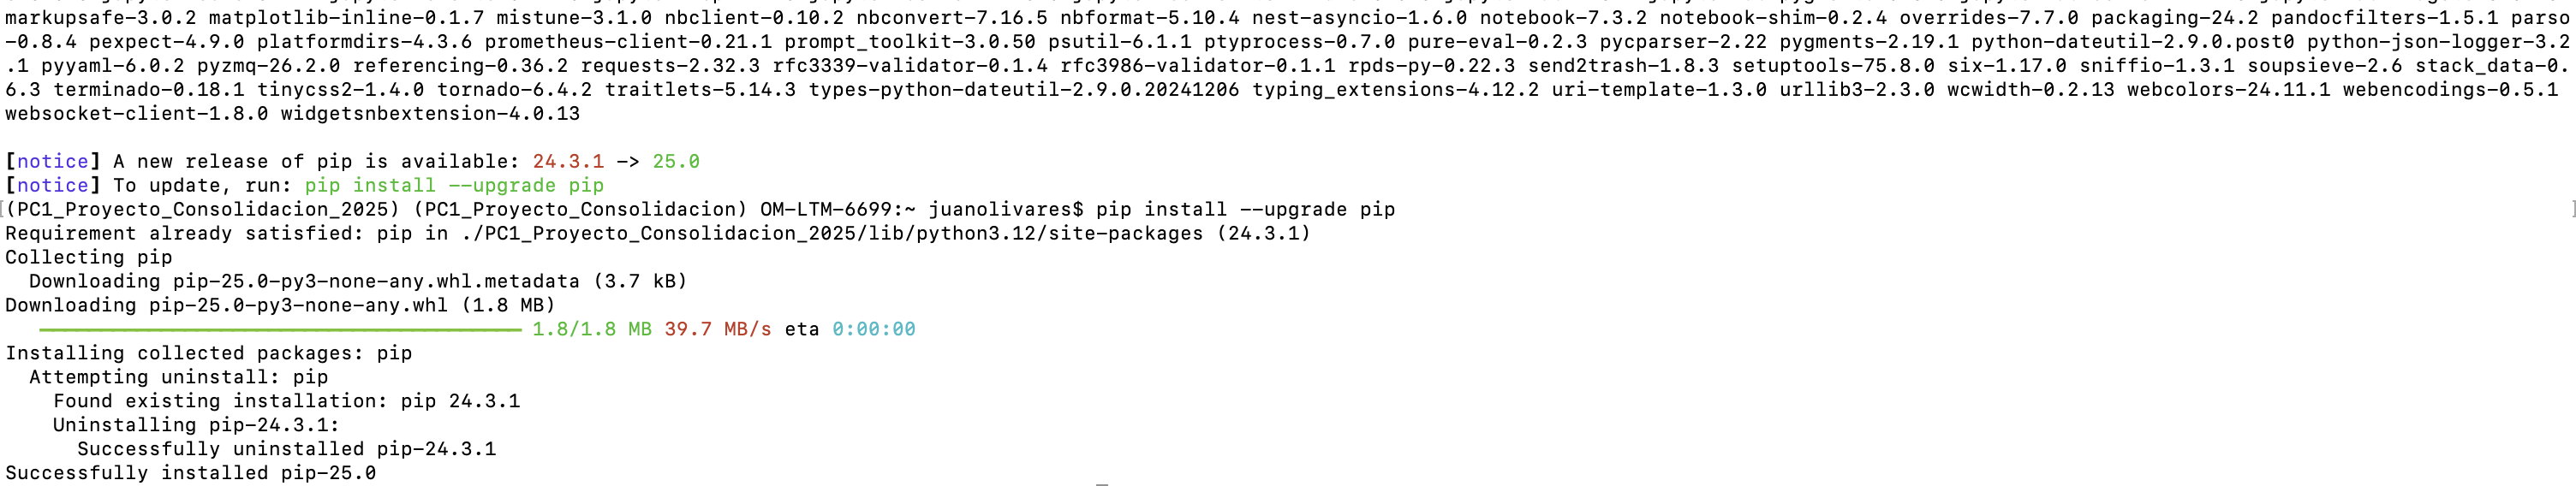

Para poder compartir el entorno, hemos generado un archivo requirements.txt que contiene todas las dependencias instaladas en el entorno

---

In [1]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


Hemos añadido el entorno virtual como kernel de Jupyter

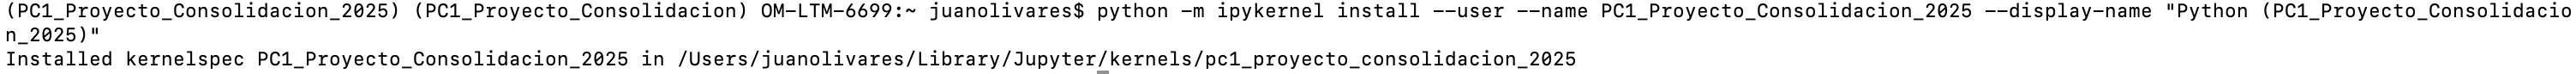

Iniciamos Jupyter Notebook

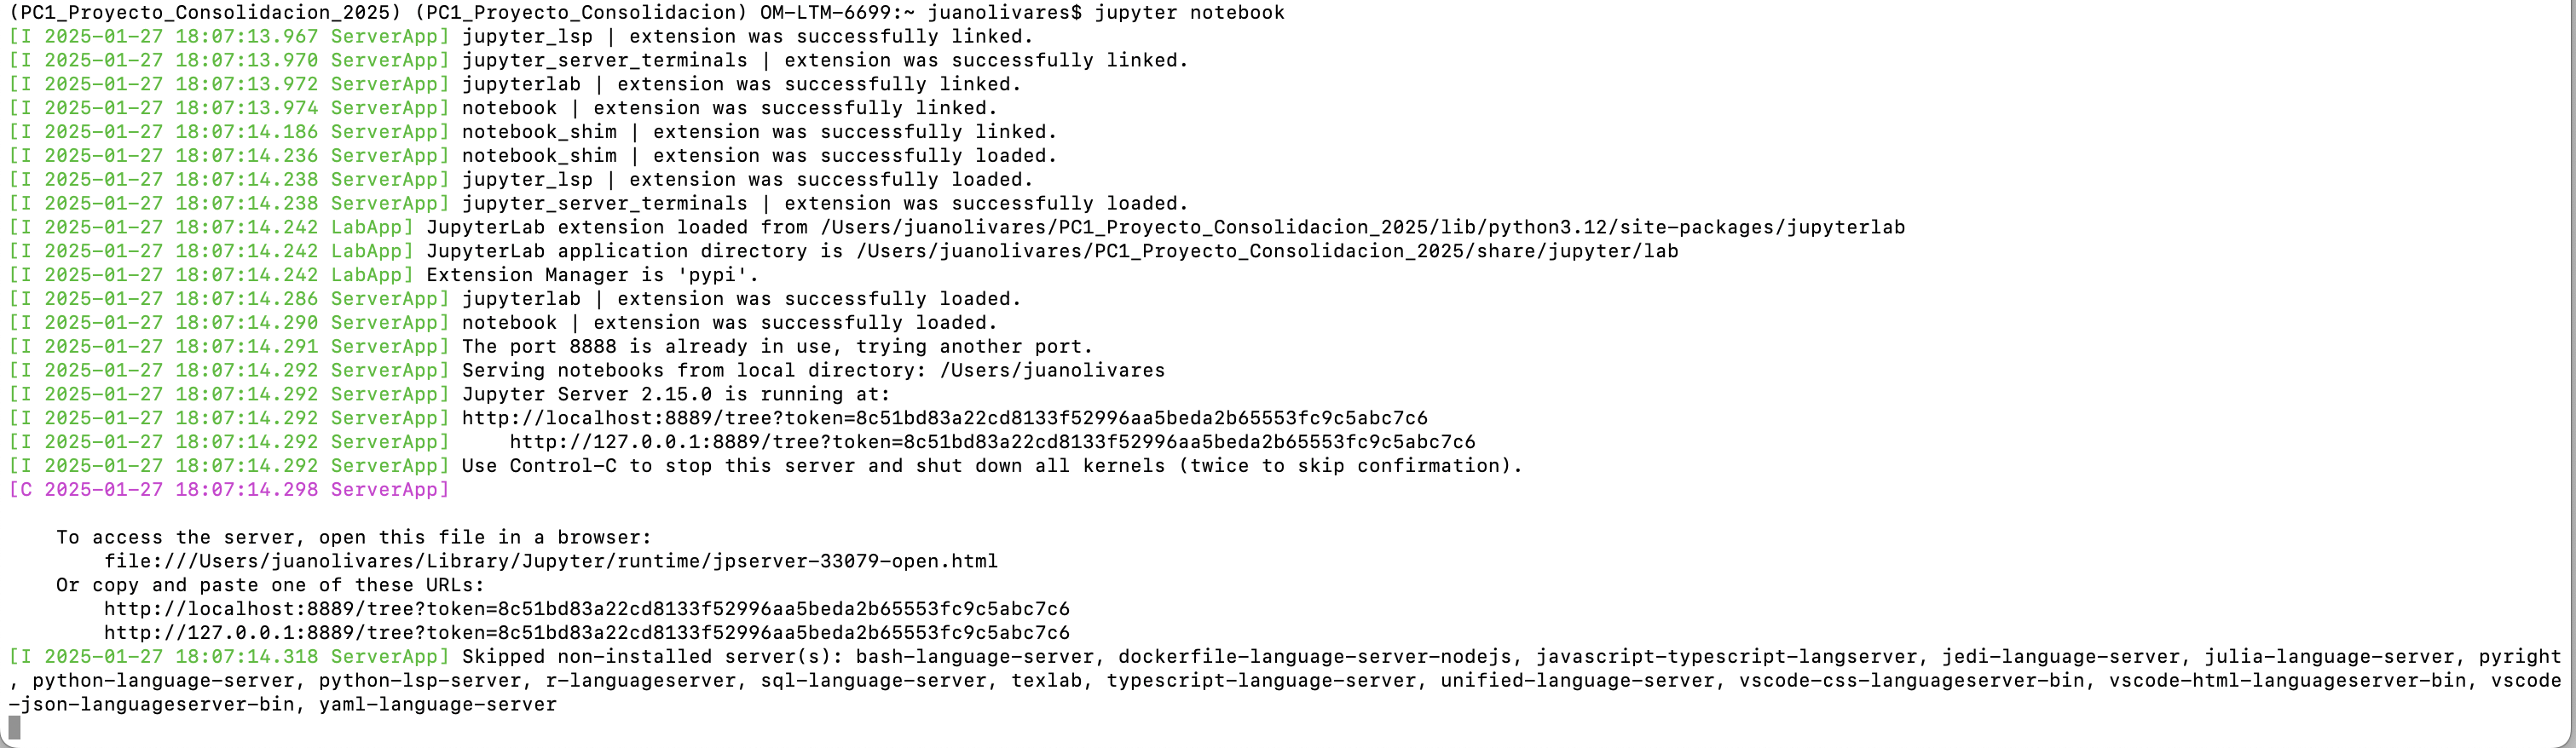

Seleccionamos el Kernel del entorno


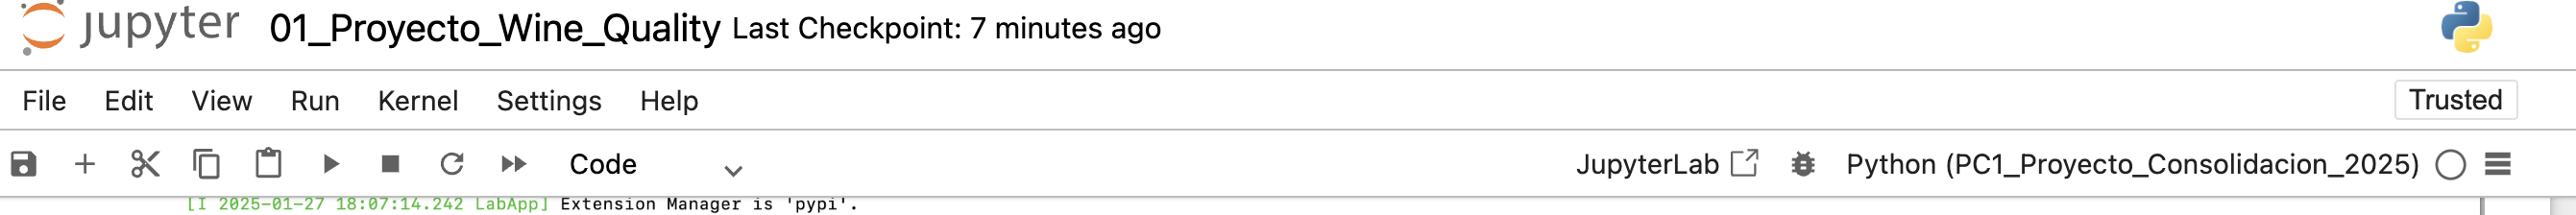

Verificar que el entorno está activo


In [2]:
import sys
print(sys.executable)


/Users/juanolivares/PC1_Proyecto_Consolidacion_2025/bin/python


In [3]:
pip install pandas numpy matplotlib seaborn jsonlines

Note: you may need to restart the kernel to use updated packages.


---


Para poder compartir el entorno, hemos generado un archivo requirements.txt que contiene todas las dependencias instaladas en el entorno


In [4]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Descarga Automática de Datasets

Script en Python que descarga automáticamente los archivos desde el repositorio

In [5]:
import os
import requests
import zipfile
import pandas as pd

In [6]:
zip_url = "http://archive.ics.uci.edu/static/public/186/wine+quality.zip"
project_folder = "/Users/juanolivares/PC1_Proyecto_Consolidacion_2025/"
zip_path = os.path.join(project_folder, "wine_quality.zip")
extract_folder = os.path.join(project_folder, "data")

In [7]:
ls -lh /Users/juanolivares/PC1_Proyecto_Consolidacion_2025/

total 192
drwxr-xr-x  48 juanolivares  staff   1.5K Feb 12 16:54 bin/
drwxr-xr-x   5 juanolivares  staff   160B Jan 28 12:59 data/
drwxr-xr-x   4 juanolivares  staff   128B Jan 27 18:34 etc/
drwxr-xr-x   3 juanolivares  staff    96B Jan 27 17:55 include/
drwxr-xr-x   4 juanolivares  staff   128B Jan 28 12:34 lib/
drwxr-xr-x  13 juanolivares  staff   416B Feb 20 19:52 notebook/
-rw-r--r--   1 juanolivares  staff   315B Jan 27 17:56 pyvenv.cfg
drwxr-xr-x   7 juanolivares  staff   224B Jan 27 18:34 share/
-rw-r--r--@  1 juanolivares  staff    89K Feb 20 18:11 wine_quality.zip


Confirmar si el ZIP existe

In [8]:
import requests

zip_url = "http://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_path = "/Users/juanolivares/PC1_Proyecto_Consolidacion_2025/wine_quality.zip"

# Descargar el archivo ZIP
response = requests.get(zip_url, stream=True)

if response.status_code == 200:
    with open(zip_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print(f"Archivo descargado correctamente en: {zip_path}")
else:
    print(f"Error en la descarga. Código de estado: {response.status_code}")


Archivo descargado correctamente en: /Users/juanolivares/PC1_Proyecto_Consolidacion_2025/wine_quality.zip


Confirmar que archivo se encuntra en la carpeta

In [9]:
ls -lh /Users/juanolivares/PC1_Proyecto_Consolidacion_2025/

total 192
drwxr-xr-x  48 juanolivares  staff   1.5K Feb 12 16:54 bin/
drwxr-xr-x   5 juanolivares  staff   160B Jan 28 12:59 data/
drwxr-xr-x   4 juanolivares  staff   128B Jan 27 18:34 etc/
drwxr-xr-x   3 juanolivares  staff    96B Jan 27 17:55 include/
drwxr-xr-x   4 juanolivares  staff   128B Jan 28 12:34 lib/
drwxr-xr-x  13 juanolivares  staff   416B Feb 20 19:52 notebook/
-rw-r--r--   1 juanolivares  staff   315B Jan 27 17:56 pyvenv.cfg
drwxr-xr-x   7 juanolivares  staff   224B Jan 27 18:34 share/
-rw-r--r--@  1 juanolivares  staff    89K Feb 26 17:37 wine_quality.zip


Verificar que tiene el ZIP descargado

In [10]:
import zipfile

zip_path = "/Users/juanolivares/PC1_Proyecto_Consolidacion_2025/wine_quality.zip"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Archivos dentro del ZIP:")
    print(zip_ref.namelist())


Archivos dentro del ZIP:
['winequality-red.csv', 'winequality-white.csv', 'winequality.names']


Extraer los archivos y crear carpeta

In [11]:
extract_folder = "/Users/juanolivares/PC1_Proyecto_Consolidacion_2025/data"

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Archivos extraídos en {extract_folder}")


Archivos extraídos en /Users/juanolivares/PC1_Proyecto_Consolidacion_2025/data


Confirmar que los archivos existen

In [12]:
ls -lh /Users/juanolivares/PC1_Proyecto_Consolidacion_2025/data/

total 696
-rw-r--r--@ 1 juanolivares  staff    82K Feb 26 17:37 winequality-red.csv
-rw-r--r--@ 1 juanolivares  staff   258K Feb 26 17:37 winequality-white.csv
-rw-r--r--@ 1 juanolivares  staff   3.2K Feb 26 17:37 winequality.names


---

## Visualización de los datos

Cargamos los datasets y echamos un vistazo a las primeras filas y columnas

In [13]:
import pandas as pd

In [14]:
file_red = "/Users/juanolivares/PC1_Proyecto_Consolidacion_2025/data/winequality-red.csv"
file_white = "/Users/juanolivares/PC1_Proyecto_Consolidacion_2025/data/winequality-white.csv"



Cargar los datasets en DataFrames de Pandas

In [15]:
df_red = pd.read_csv(file_red, sep=";")
df_white = pd.read_csv(file_white, sep=";")


Ver cuántas filas y columnas tiene cada dataset

In [16]:

print(f"Dataset Vino Tinto: {df_red.shape[0]} filas y {df_red.shape[1]} columnas")
print(f"Dataset Vino Blanco: {df_white.shape[0]} filas y {df_white.shape[1]} columnas")


Dataset Vino Tinto: 1599 filas y 12 columnas
Dataset Vino Blanco: 4898 filas y 12 columnas


Mostrar las primeras filas de cada dataset


**Primeras filas del dataset de Vino Tinto**




In [28]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


**Primeras filas del dataset de Vino Blanco**

In [30]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Añadimos una columna con la variable que identifica si el vino es tinto o blanco.


In [33]:
df_red["type"] = "red"
df_white["type"] = "white"

In [38]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [37]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


# **2.  Combinar los datos**

## Combinamos los dos datasets en uno


In [42]:
df_wines = pd.concat([df_red, df_white])

In [43]:
df_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## **Revisamos el Dataset**
- ¿Cuántos registros tenemos? 
- ¿Cuántas variables y de qué tipo?

In [44]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [46]:
df_info = pd.DataFrame({
    'Column': df_wines.columns,
    'Non-Null Count': [df_wines[col].count() for col in df_wines.columns],
    'Data Type': [df_wines[col].dtype for col in df_wines.columns]
})


In [47]:
df_info_styled = df_info.style.set_caption("Información General")

df_info_styled = df_info_styled.set_table_styles([
    {"selector": ".row_heading", "props": [("display", "none")]},
    {"selector": ".blank", "props": [("display", "none")]}
], overwrite=False)

df_info_styled


,Column,Non-Null Count,Data Type
0,fixed acidity,6497,float64
1,volatile acidity,6497,float64
2,citric acid,6497,float64
3,residual sugar,6497,float64
4,chlorides,6497,float64
5,free sulfur dioxide,6497,float64
6,total sulfur dioxide,6497,float64
7,density,6497,float64
8,pH,6497,float64
9,sulphates,6497,float64


Guardamos el DataFrame en una variable y le damos formato para que quede más claro

In [49]:

df_summary = df_wines.describe()


# df_summary = df_summary.T


df_summary_styled = (
    df_summary
    .style
    .set_caption("Resumen Estadístico")
    .format(precision=2) 
)

df_summary_styled


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


# **2.  Búqueda de atípicos y datos ausentes**

**Objetivo**
- Realiza un análisis estadístico o inspección visual de cada columna numérica para identificar valores atípicos.
- Usa Pandas para filtrar y eliminar los datos atípicos y los valores ausentes. Explica en tu entrega qué criterios utilizaste para identificar los atípicos.


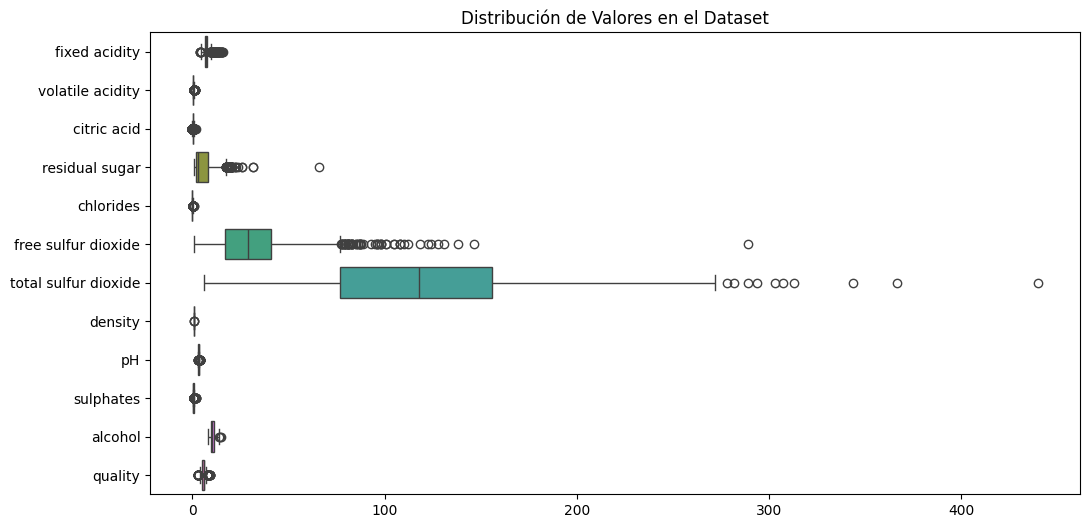

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generamos un boxplot para visualizar la distribución de todas las variables numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_wines, orient="h")
plt.title("Distribución de Valores en el Dataset")
plt.show()


Explicación:

- Este gráfico nos permite ver de manera visual los posibles atípicos en todas las variables. 
- Vemos, por ejemplo, que en las variables relacionadas con el sulfur (total y free sulfur dioxide) tienen muchos valores fuera de los bigotes.

Visualmente no se observan que otras variables tengan valores atípicos a través de un gráfico boxplot.

Aunque ya hemos analizado algunas variables de forma visual, el equipo decide aplicar un análisis estadístico usando el criterio del rango intercuartílico (IQR) para confirmar la presencia de valores extremos en todas las columnas numéricas. Quedan descartadas otras opciones para analizar atipicos tales como los histogramas o z-score. Se han dejado solo como documentación de los pasos utlizados aunque no se utilizarán.

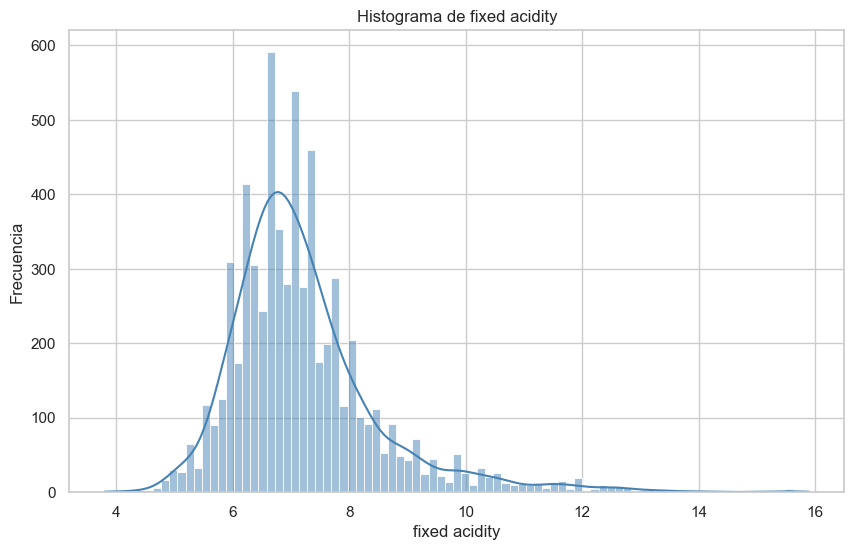

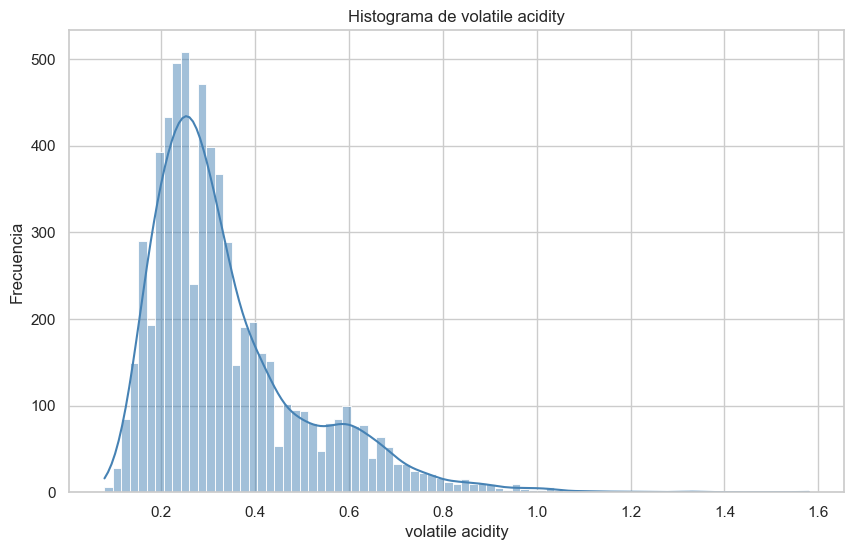

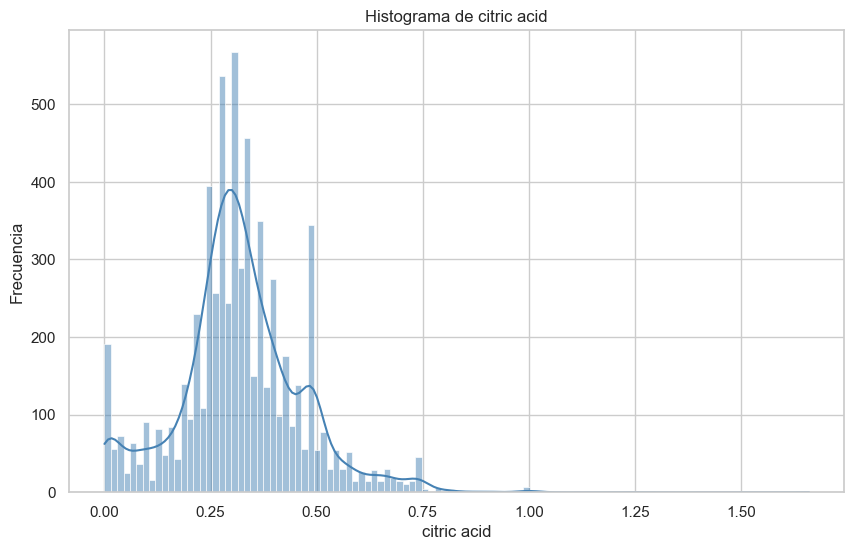

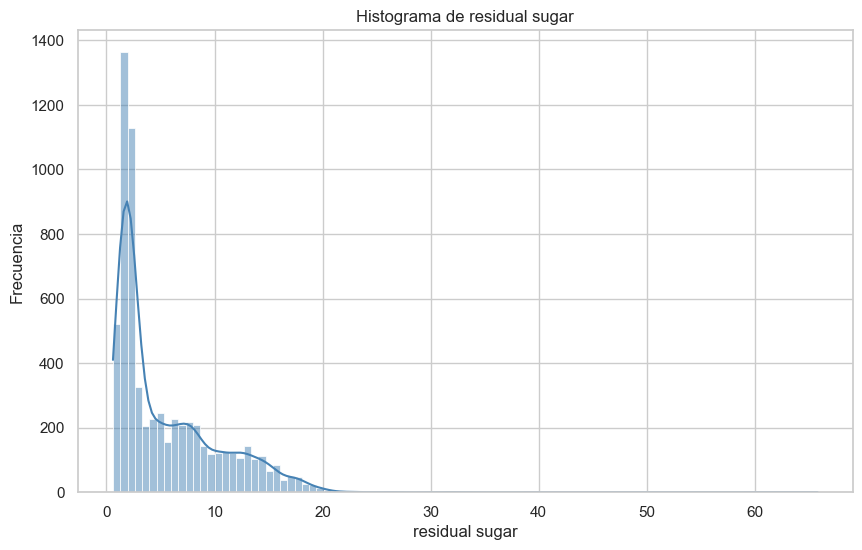

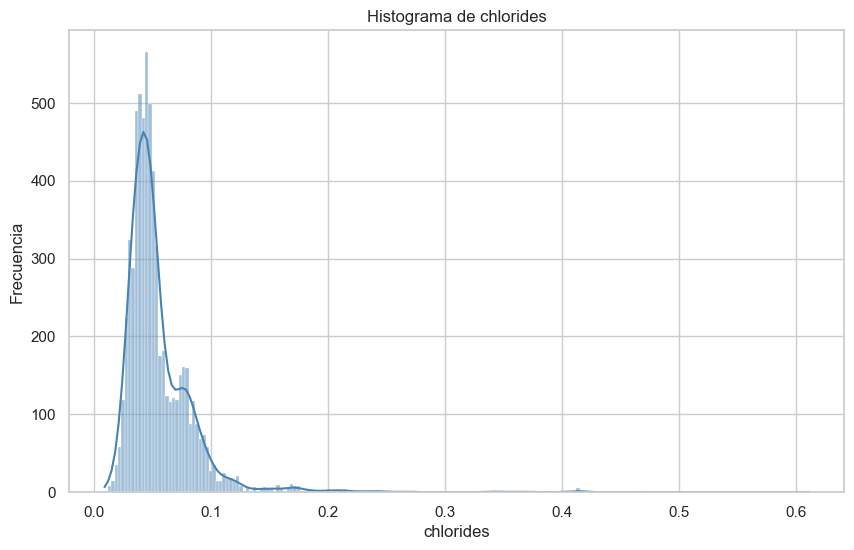

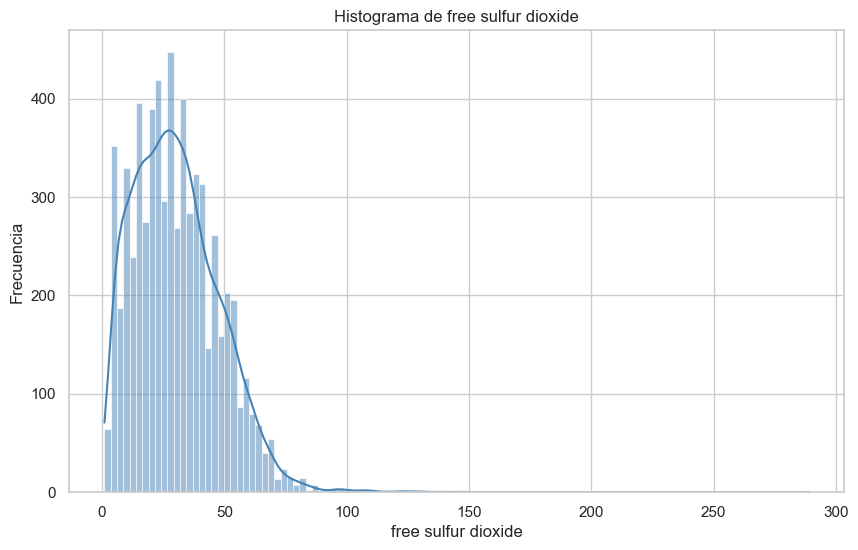

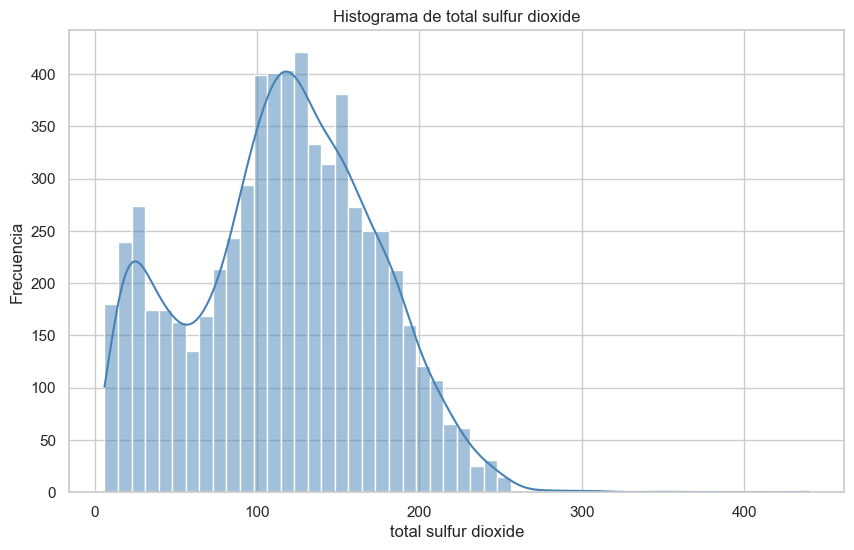

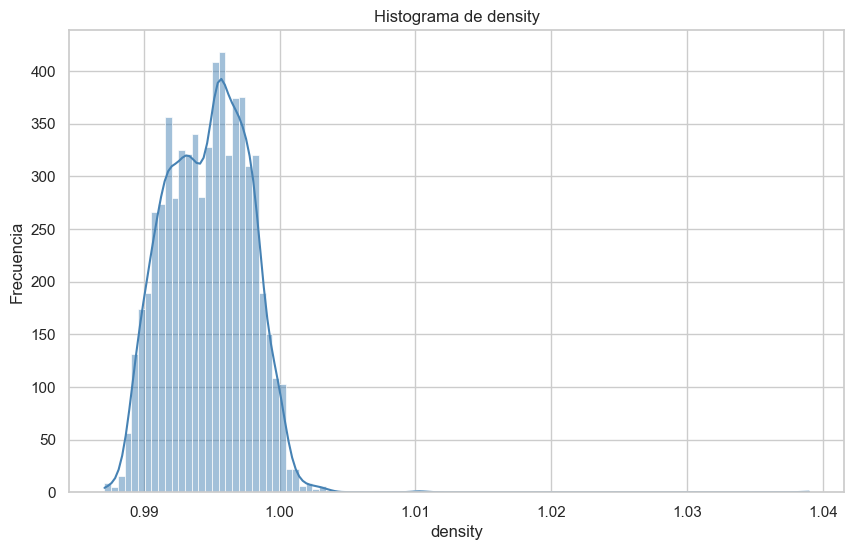

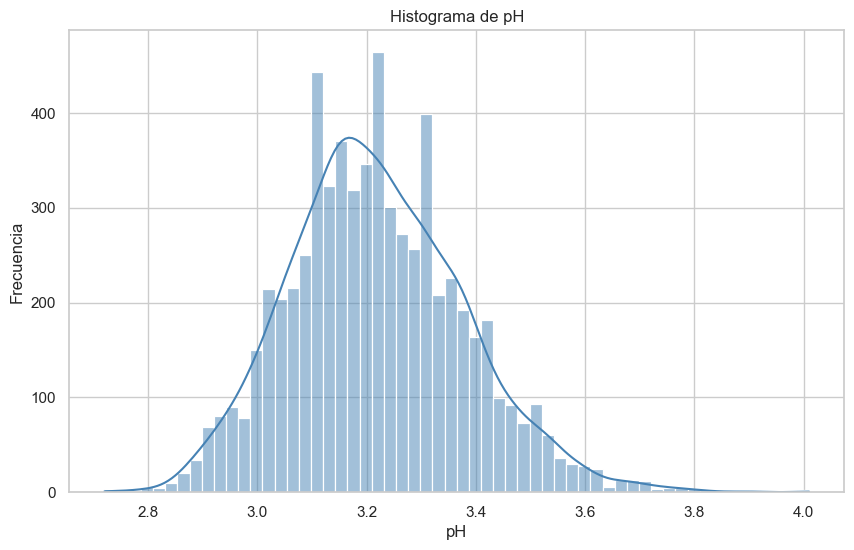

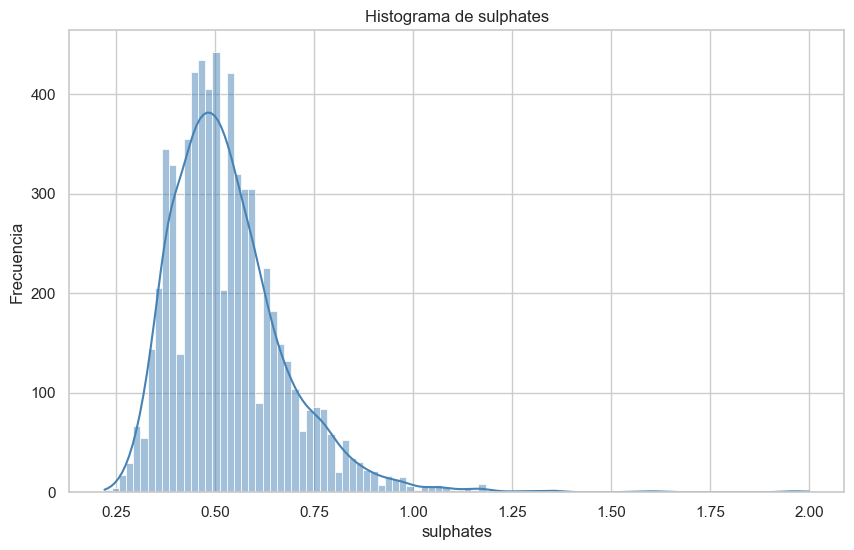

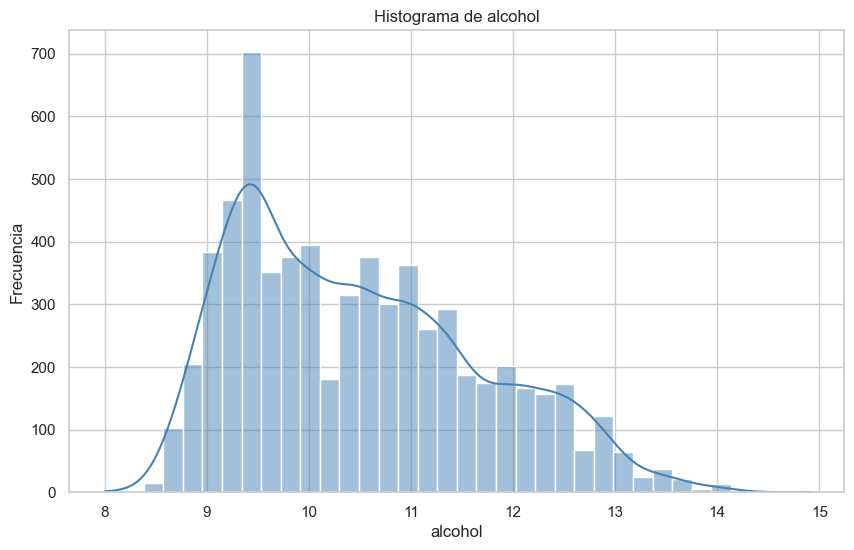

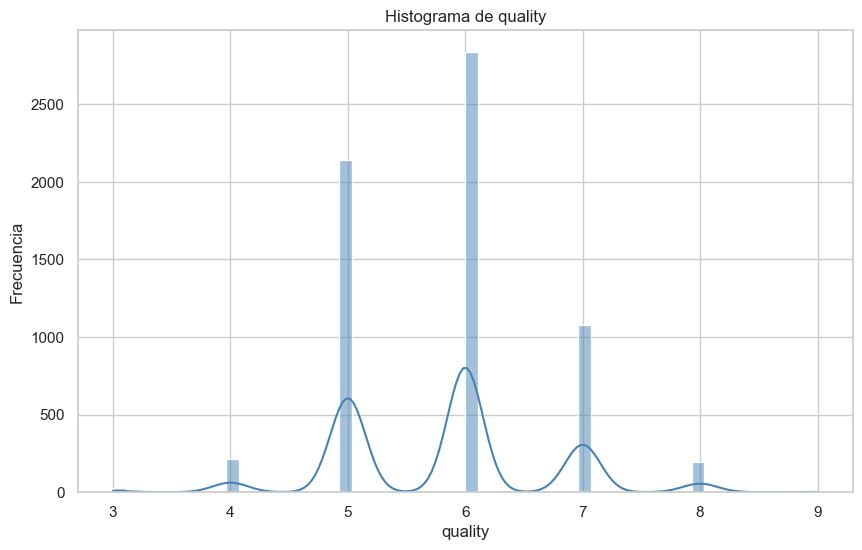

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definición del estilo  mejor visualización
sns.set(style='whitegrid')

# Lista de variables a analizar 
variables_interes = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

# Histograma para cada variable
for var in variables_interes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_wines[var], kde=True, color='steelblue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


In [59]:

from scipy import stats
import numpy as np

# Recorremos cada variable para calcular su z-score
for var in variables_interes:
    # Calculamos el z-score para la variable
    z_scores = np.abs(stats.zscore(df_wines[var]))
    
    # Identificamos los valores que superan el umbral de 3
    atipicos = df_wines[var][z_scores > 3]
    
    print(f"\nValores atípicos en '{var}' (z-score > 3):")
    print(atipicos)



Valores atípicos en 'fixed acidity' (z-score > 3):
3       11.2
197     11.5
205     12.8
206     12.8
212     11.6
        ... 
1362    11.6
1454    11.7
1548    11.2
1526    14.2
2050    11.8
Name: fixed acidity, Length: 128, dtype: float64

Valores atípicos en 'volatile acidity' (z-score > 3):
1       0.880
38      1.130
46      0.935
94      1.020
98      0.900
        ...  
1856    0.910
1951    1.005
2154    0.930
2781    0.965
4039    1.100
Name: volatile acidity, Length: 95, dtype: float64

Valores atípicos en 'citric acid' (z-score > 3):
151     1.00
258     0.76
353     0.79
395     0.76
442     0.76
1574    0.78
207     0.88
745     1.66
946     1.00
1051    0.81
1551    0.99
1722    1.00
1775    1.00
2186    0.81
2465    0.78
2466    0.79
2820    0.82
3043    1.00
3064    0.80
3066    0.80
3152    1.23
3497    1.00
3848    0.79
3911    0.82
4173    0.86
4591    0.78
4626    0.91
4632    0.91
Name: citric acid, dtype: float64

Valores atípicos en 'residual sugar' (z-score >

In [60]:
import numpy as np
from scipy import stats
import pandas as pd

# Supongamos que 'df_wines' es tu DataFrame original
# Filtra sólo columnas numéricas (opcional, si tienes columnas no numéricas)
df_wines_numeric = df_wines.select_dtypes(include=[np.number])

# Listado de columnas de interés (puedes usar df_wines_numeric.columns o un subconjunto)
variables_interes = df_wines_numeric.columns

# Umbral z-score
threshold = 3

outliers_data = []

for var in variables_interes:
    # Calculamos z-score
    z_scores = np.abs(stats.zscore(df_wines_numeric[var]))
    # Detectamos filas donde el z-score es mayor que el threshold
    outliers = df_wines_numeric[var][z_scores > threshold]
    
    # Guardamos la información en una lista
    outliers_data.append({
        "Variable": var,
        "Outlier Count": len(outliers),
        "Outlier %": round(100 * len(outliers) / len(df_wines), 2)
    })

# Convertimos la lista a DataFrame
df_outliers = pd.DataFrame(outliers_data)

# Estilizamos la tabla
df_outliers_styled = (
    df_outliers
    .style
    .set_caption("Outliers Detectados por Z-Score (umbral=3)")
    .format({"Outlier %": "{:.2f}"})  # Ajusta el formato de la columna
    .background_gradient(cmap="Reds", subset=["Outlier Count"])  # Color en la columna de conteo
)

df_outliers_styled


,Variable,Outlier Count,Outlier %
0,fixed acidity,128,1.97
1,volatile acidity,95,1.46
2,citric acid,28,0.43
3,residual sugar,26,0.40
4,chlorides,107,1.65
5,free sulfur dioxide,36,0.55
6,total sulfur dioxide,8,0.12
7,density,3,0.05
8,pH,33,0.51
9,sulphates,75,1.15


# **Limpieza y Exploración**

1. Calculamos los cuartiles (Q1 y Q3) y el rango intercuartílico para cada columna numérica.

Seleccionamos solo las columnas numéricas del DataFrame 'df_wines', si no nos da error (TypeError: unsupported operand type(s) for -: 'str' and 'str')


In [ ]:
df_numerico = df_wines.select_dtypes(include=[np.number])


# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para las columnas numéricas
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
RI = Q3 - Q1

print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("Rango Intercuartílico (RI):\n", RI)



In [ ]:

estadisticas_df = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'RI': RI
})


estadisticas_df


## Identificación de Valores Atípicos

2. Identificar los valores atípicos utilizando el RI. Consideramos atípicos los registros en los que al menos una variable tenga un valor menor que (Q1 - 1.5 * RI) o mayor que (Q + 1.5 * RI), como la definición de la documentación. Filtramos primeor únicamente las columnas numéricas para calcular los cuartiles y el RI y nos aseguramos de que df_numerico tenga las mismas columnas que Q1.


In [ ]:

df_numerico = df_numerico.reindex(columns=Q1.index)

mascara_atipicos = ((df_numerico < (Q1 - 1.5 * RI)) | (df_numerico > (Q3 + 1.5 * RI))).any(axis=1)
print("Número de registros con valores atípicos:", mascara_atipicos.sum())


3. Borramos los registros que contienen valores atípicos del DataFrame original

In [ ]:
df_sin_atipicos = df_wines[~mascara_atipicos]

## Manejo de Valores Ausentes

4. Borramos los registros que contengan datos ausentes (nulos).

In [ ]:
df_final = df_sin_atipicos.dropna()

5. **RESUMEN**:
   Vemos como ha cambiado el DataFrame orginal en un dataframe resumen.

In [ ]:
resumen_dict = {
    "Descripción": [
        "Registros originales",
        "Registros con valores atípicos",
        "Registros sin atípicos",
        "Registros finales (sin datos ausentes)"
    ],
    "Cantidad": [
        df_wines.shape[0],
        mascara_atipicos.sum(),
        df_sin_atipicos.shape[0],
        df_final.shape[0]
    ]
}

resumen_df = pd.DataFrame(resumen_dict)

# DataFrame
resumen_df


# **Integración con SQLite**

En esta sección, el grupo integra el DataFrame limpio (**df_final**) en una base de datos SQLite persistente. Para ello, se han tomado las siguientes decisiones basadas en las mejores prácticas y en la documentación oficial:

1. **Importar librerías:**  
   Utilizamos la librería `sqlite3` de Python, la cual es parte de la biblioteca estándar, y Pandas, que facilita la manipulación y exportación de datos.  
   Fuente: [SQLite Python Documentation](https://docs.python.org/3/library/sqlite3.html) y [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html).


In [ ]:
import sqlite3



2. **Creación de la base de datos:**  
   Se crea o se conecta a un archivo de base de datos llamado `wine.db`. Esta decisión permite mantener los datos de forma persistente y reproducible, ya que SQLite crea automáticamente el archivo si este no existe.


In [ ]:
conn = sqlite3.connect('wine.db')
cursor = conn.cursor()


3. **Almacenamiento de los datos depurados:**  
   Se utiliza el método `to_sql` de Pandas para exportar el DataFrame a la tabla `wine_data`. Hemos configurado `if_exists='replace'` para asegurarnos de que cada ejecución inserte únicamente los datos actuales, evitando acumulaciones de registros anteriores.  
   Fuente: [Pandas DataFrame.to_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html).


In [ ]:
df_final.to_sql(
    name='wine_data',      # Nombre de la tabla en SQLite
    con=conn,              # Conexión a la base de datos
    if_exists='replace',   # Reemplaza la tabla si ya existe
    index=False            # No se guarda el índice de Pandas como columna
)


4. **Verificamos la conexión a la BBDD:**  
   Se ejecuta una consulta SQL para confirmar que los datos se han almacenado correctamente y, al finalizar, se cierra la conexión para liberar recursos.

In [ ]:
cursor.execute('SELECT COUNT(*) FROM wine_data')
registro = cursor.fetchone()[0]
print(f"Número de registros en 'wine_data': {registro}")

Cerramos la conexión a la BBDD para liberar recursos

In [ ]:
#conn.close()

In [ ]:
conn = sqlite3.connect('wine.db')
cursor = conn.cursor()

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


# **Consultas en SQLite**

**Consulta 1**: Promedio de calidad (quality) por tipo de vino (type)

In [ ]:
cursor.execute("""
    SELECT 
        type, 
        AVG(quality) AS avg_quality
    FROM wine_data
    GROUP BY type
""")
rows_1 = cursor.fetchall()
df1 = pd.DataFrame(rows_1, columns=["type", "avg_quality"])

display(df1)



**Consulta 2**: Conteo de vinos con nivel de alcohol superior a 10.5, agrupados por tipo

In [ ]:
cursor.execute("""
    SELECT 
        type,
        COUNT(*) AS count_wines
    FROM wine_data
    WHERE alcohol > 10.5
    GROUP BY type
""")
rows_2 = cursor.fetchall()
df2 = pd.DataFrame(rows_2, columns=["type", "count_wines"])

display(df2)


**Consulta 3**: Conteo de vinos por nivel de acidez (fixed_acidity), agrupados en rangos
cursor.execute("""

In [ ]:
cursor.execute("""
    SELECT
        CASE
            WHEN "fixed acidity" < 5 THEN '0-5'
            WHEN "fixed acidity" >= 5 AND "fixed acidity" < 10 THEN '5-10'
            WHEN "fixed acidity" >= 10 AND "fixed acidity" < 15 THEN '10-15'
            ELSE '15+'
        END AS acidity_range,
        COUNT(*) AS count_wines
    FROM wine_data
    GROUP BY acidity_range
""")
rows_3 = cursor.fetchall()
df3 = pd.DataFrame(rows_3, columns=["acidity_range", "count_wines"])

display(df3)

# **Exportación a JSONLines**


**6.1. ¿Qué estructura de datos de python es la más similar a un documento noSQL?**
- Pandas cuenta con el método `DataFrame.to_json()` que, al configurarse con `orient='records'` y `lines=True`, produce un archivo en formato JSONLines.  
- Cada línea del archivo representará un documento JSON independiente, facilitando su posterior inserción en sistemas NoSQL.


**6.2. ¿Cómo podemos usar Pandas para transformar los datos de una de las consultas en un archivo JSONLines?**
- Pandas cuenta con el método `DataFrame.to_json()` que, al configurarse con `orient='records'` y `lines=True`, produce un archivo en formato JSONLines.  
- Cada línea del archivo representará un documento JSON independiente, facilitando su posterior inserción en sistemas NoSQL.



In [24]:
pip install jsonlines

Note: you may need to restart the kernel to use updated packages.


In [ ]:

import jsonlines
import numpy as np


In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


In [ ]:

# 1. Conexión a la base de datos
conn = sqlite3.connect('wine_data.db')
cursor = conn.cursor()

# 2. Consulta 1: Promedio de calidad por tipo de vino (tabla: wine_data)
cursor.execute("""
SELECT
    type,
    AVG(quality) AS avg_quality
FROM wine_data
GROUP BY type
""")
rows_1 = cursor.fetchall()



In [ ]:
# Convertimos los resultados en un DataFrame con las columnas específicas
df_consulta_1 = pd.DataFrame(rows_1, columns=["type", "avg_quality"])



In [ ]:
# (Opcional) Ver el resultado
print("Resultado de Consulta 1:")
display(df_consulta_1)



**6.3¿Cómo podemos usar la librería `jsonlines` para exportar los datos a JSONLines?**
- La librería `jsonlines` ofrece una forma sencilla de iterar sobre registros (diccionarios) y escribirlos línea a línea en un archivo `.jsonl`.  
- Primero convertimos el DataFrame a una lista de diccionarios con `df.to_dict(orient='records')`. Luego, cada diccionario se escribe en una línea.



In [ ]:

df_consulta_1.to_json("consulta1.jsonl", orient="records", lines=True)

records = df_consulta_1.to_dict(orient='records')
with jsonlines.open("consulta1_jsonlines.jsonl", mode='w') as writer:
    for record in records:
        writer.write(record)




**6.4. ¿Qué problemas podrían surgir al transformar un DataFrame en JSONLines?**
- Tipos de datos no serializables (por ejemplo, objetos Python complejos, funciones, etc.).  
- Valores faltantes** (`NaN`) que necesitan convertirse en `None` o en una cadena válida.  
- Tipos especiales** como `datetime` o `np.array` que requieren un formateo o conversión previa.  
- Codificación de caracteres especiales que podrían generar errores si no se manejan adecuadamente.


**6.5 Añadimos una columna que sea originalmente un `np.array`, ¿qué sucede al transformarlo en JSONLines?**: 
       Antes nos aseguramos de tener tantas filas como elementos en el array, en este ejemplo hay 2 filas



In [ ]:
df_consulta_1['array_column'] = [np.array([1, 2, 3]), np.array([4, 5, 6])]



**6.6. Añade una columna que sea originalmente un `pd.datetime`, ¿qué sucede al transformarlo en JSONLines?**
- Un objeto `pd.datetime` se serializa como una cadena en formato ISO 8601 (por ejemplo, `"2025-02-19T00:00:00"`).  
- Este comportamiento facilita la posterior interpretación de la fecha, pero es importante confirmar que la base de datos NoSQL interprete o almacene correctamente dichas cadenas como fechas.

In [ ]:

df_consulta_1['date_column'] = pd.to_datetime(['2023-01-01', '2023-02-01'])



Exportamos de nuevo para ver el comportamiento con las columnas añadidas

In [ ]:
df_consulta_1.to_json("consulta1_extended.jsonl", orient="records", lines=True)

Exportación con jsonlines (columnas extra incluidas)

In [ ]:
# 6. Exportación con jsonlines (columnas extra incluidas)
records_extended = df_consulta_1.to_dict(orient='records')
with jsonlines.open("consulta1_extended_jsonlines.jsonl", mode='w') as writer:
    for record in records_extended:
        writer.write(record)

Esto ocurre porque jsonlines no sabe cómo serializar un np.ndarray de forma nativa. Pandas sí hace una conversión automática a listas cuando usamos to_json(), pero en el proceso manual con jsonlines, el diccionario aún contiene un np.array, que provoca el error. A continuación detallamos una **posible solución**: 

In [ ]:
import numpy as np

# Convierte cada np.array a lista de Python
df_consulta_1['array_column'] = df_consulta_1['array_column'].apply(lambda arr: arr.tolist())


In [ ]:
import jsonlines

records_extended = df_consulta_1.to_dict(orient='records')

with jsonlines.open("consulta1_extended_jsonlines.jsonl", mode='w') as writer:
    for record in records_extended:
        writer.write(record)


El módulo estándar json) no sabe cómo serializar un objeto pd.Timestamp. Al usar df.to_json(), Pandas hace la conversión automáticamente a una cadena con formato ISO, pero cuando escribimos manualmente con jsonlines, debemos encargarnos de convertir los timestamps a un tipo compatible (normalmente una cadena). La solución que aplicamos fue la siguiente:
1. Conviertimos las columnas pd.Timestamp a cadenas.
2. Hicimos lo mismo que con np.array: si hay más columnas con tipos no serializables, conviértelas antes de llamar a writer.write().
   
Creamos una función que recorra todas las celdas del DataFrame y aplique la conversión necesaria a tipos de datos no serializables (como np.array, pd.Timestamp, etc.).






In [ ]:
def fix_types(value):
    if isinstance(value, np.ndarray):
        return value.tolist()
    elif isinstance(value, pd.Timestamp):
        return value.isoformat()
    else:
        return value



Aplicamos la función a todo el DataFrame

In [ ]:
df_consulta_1 = df_consulta_1.applymap(fix_types)


Con este cambio actualizamos la función según la recomendación de la documentación. A partir de Pandas 2.0, la función DataFrame.applymap() está marcada como obsoleta, y la recomendación es usar apply(...).map(...) en su lugar

In [ ]:
df_consulta_1 = df_consulta_1.apply(lambda col: col.map(fix_types))

Luego generamos tus 'records' y escribimos con jsonlines

In [ ]:
records_extended = df_consulta_1.to_dict(orient='records')

with jsonlines.open("consulta1_extended_jsonlines.jsonl", mode='w') as writer:
    for record in records_extended:
        writer.write(record)

In [ ]:
# Cerramos el cursor y la conexión
# cursor.close()
# conn.close()


# **Análisis Final**


## Factores Asociados a Mayor Calidad


## Visualizaciones Relevantes



# **Conclusiones**


## Resumen de Hallazgos


## Retos y Aprendizajes